### Introduction 
### In this notebook ,i will be predicting the probability of identifying a pulsaar star using deep neural networks(DNN). The data is readily available  using below link: https://archive.ics.uci.edu/ml/datasets/HTRU2. HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

### Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .
#### These are the variables that were used Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#importing vizualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
#loading the data to your notebook
data=pd.read_csv('pulsar_stars.csv')

In [3]:
#checking the top 5 entries in the dataset
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
data.info() #FGeneraal overview of the data showing total number of entries in each columnn total number of missing values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
data.describe() #statistical representation of the data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
#finding the total number of missing values in each column  
for i in data.columns:
    a=data[i].isnull().sum()
    print("There are {} missing values in {}".format(a,i))

There are 0 missing values in  Mean of the integrated profile
There are 0 missing values in  Standard deviation of the integrated profile
There are 0 missing values in  Excess kurtosis of the integrated profile
There are 0 missing values in  Skewness of the integrated profile
There are 0 missing values in  Mean of the DM-SNR curve
There are 0 missing values in  Standard deviation of the DM-SNR curve
There are 0 missing values in  Excess kurtosis of the DM-SNR curve
There are 0 missing values in  Skewness of the DM-SNR curve
There are 0 missing values in target_class


# From the above,there are no missing values in the data

In [7]:
#total count of both target values in the dataset
data['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [8]:
#Finding the correlation of the dataset
data.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

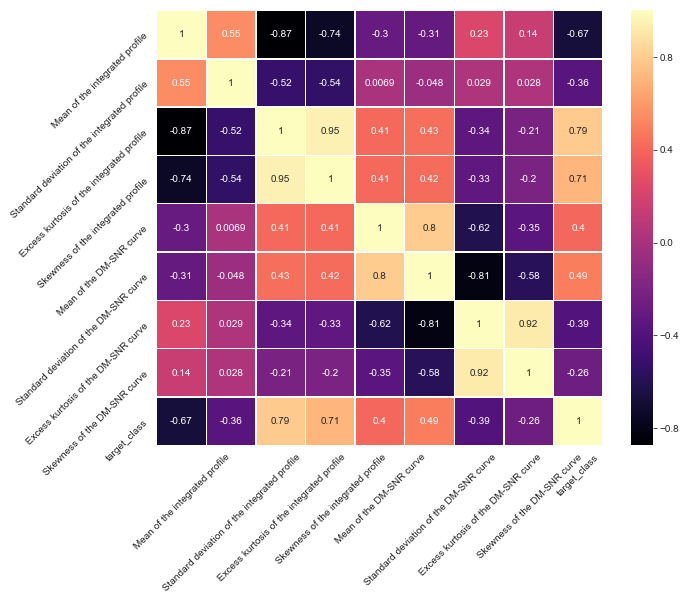

In [9]:
#visualization of the correlatiop
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='white',cmap='magma')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

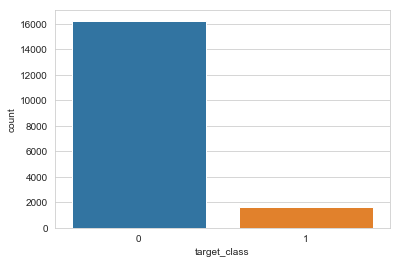

In [10]:
#Graphical representation of the target class
sns.countplot(data['target_class'])

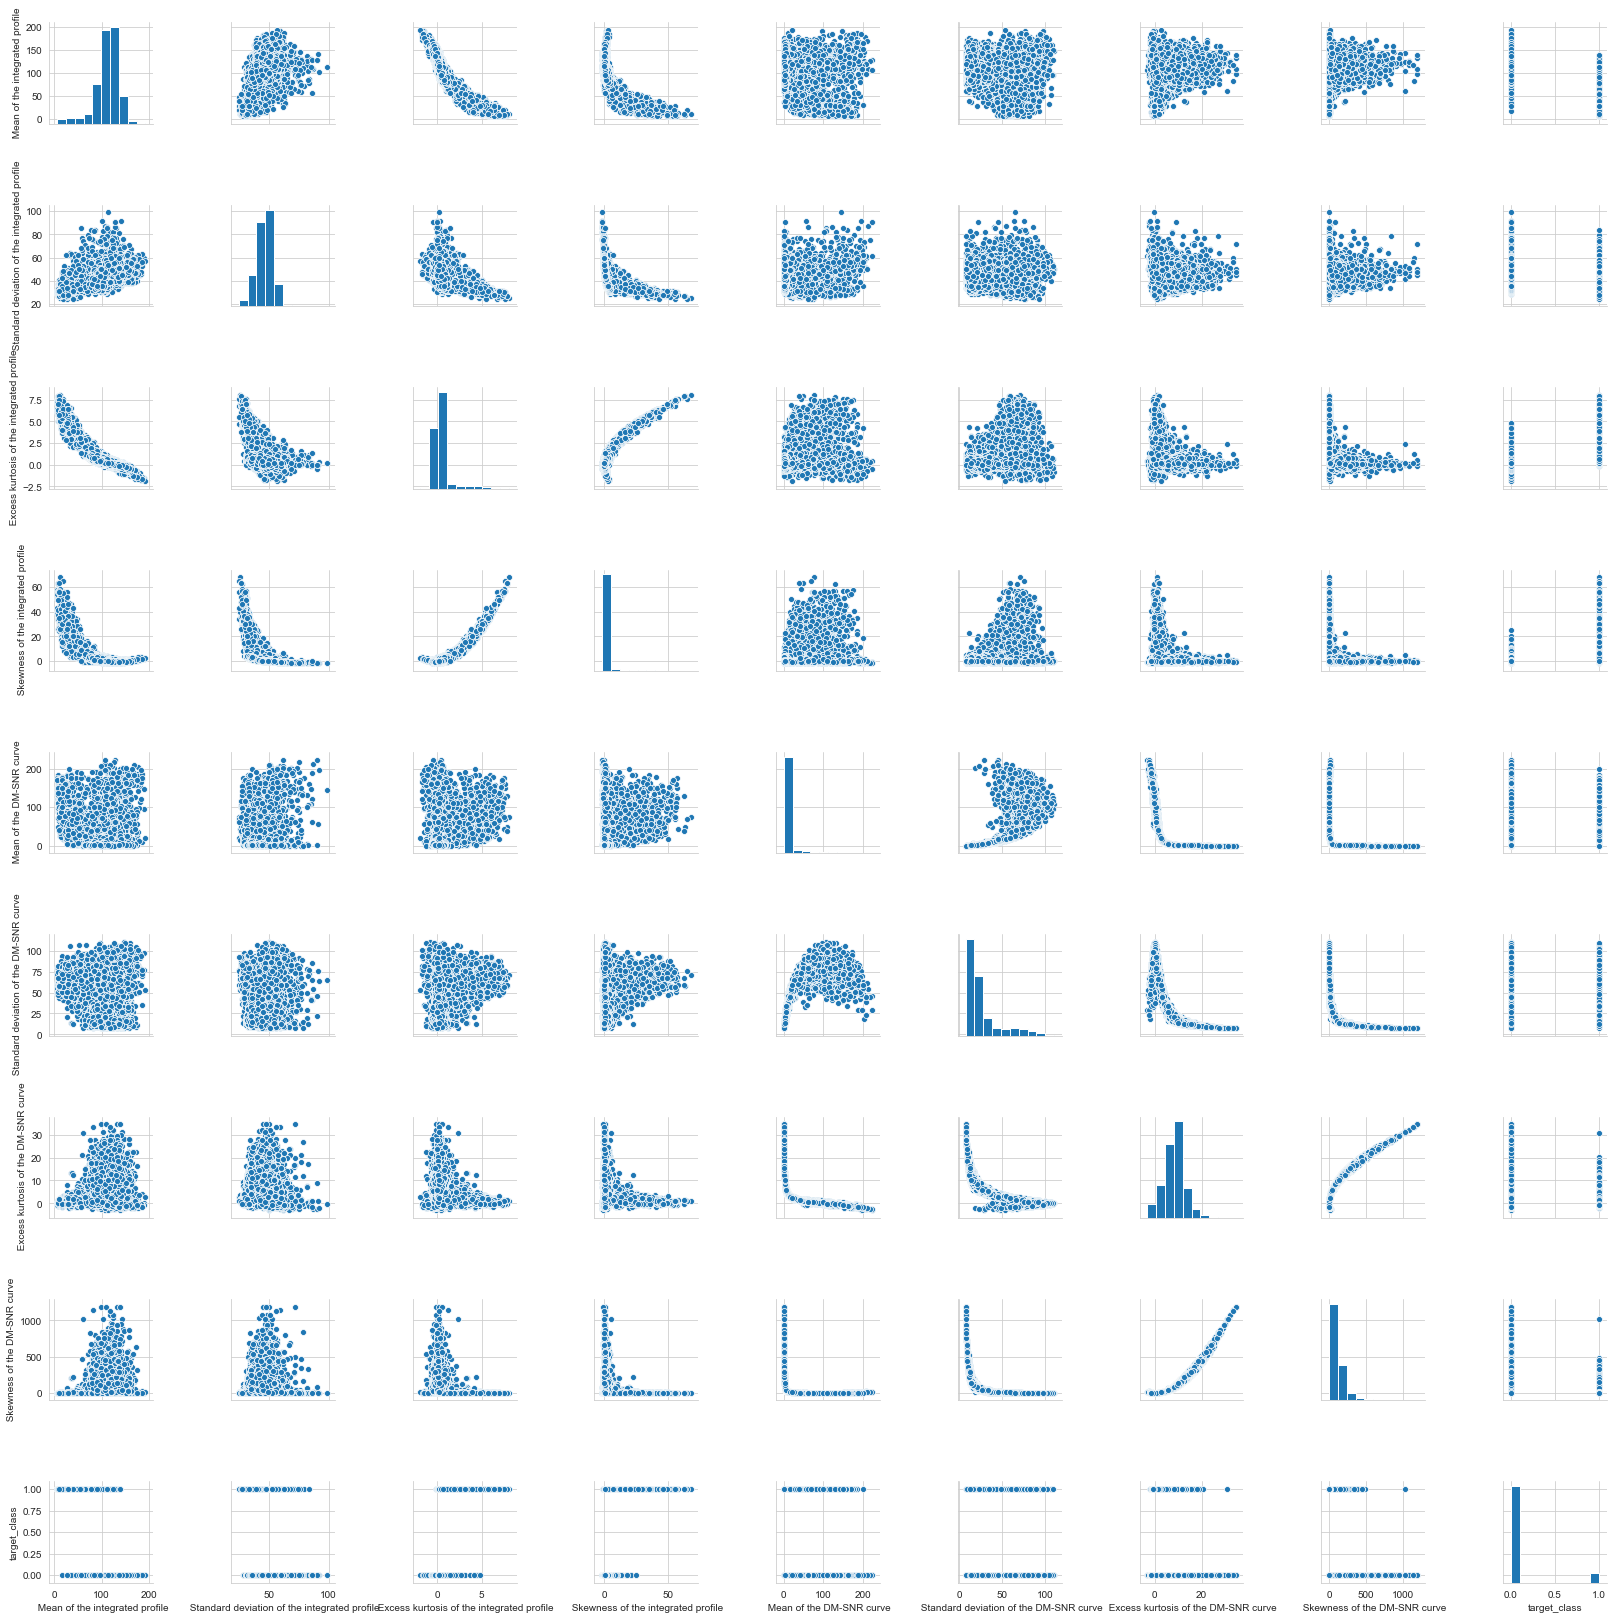

In [11]:
sns.pairplot(data)

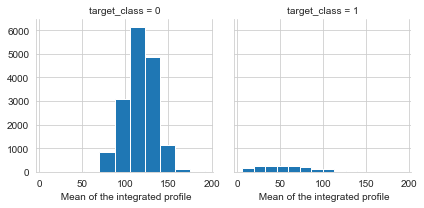

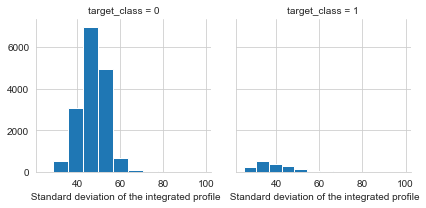

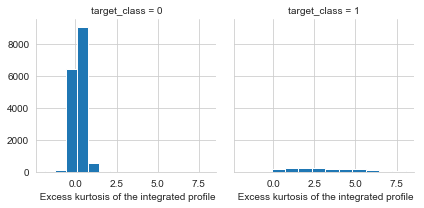

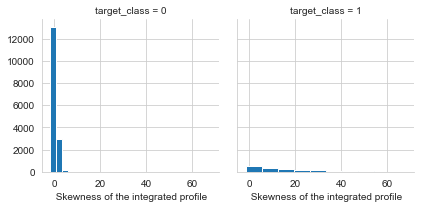

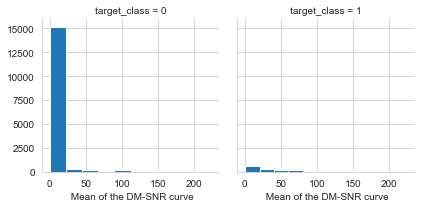

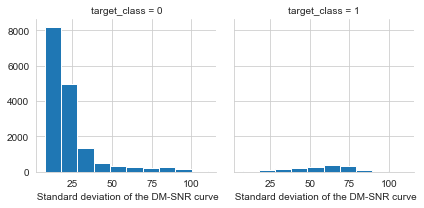

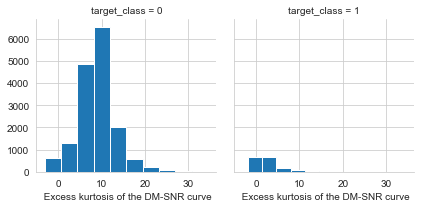

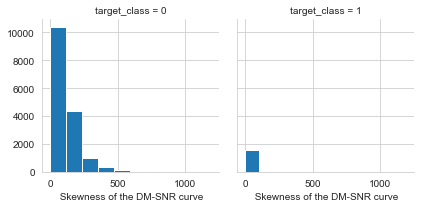

In [12]:
#distribution of target_class in each variable
for i in data.drop('target_class',axis=1).columns:
    a=sns.FacetGrid(data,col="target_class")
    a.map(plt.hist, i)
    

In [13]:
#standardizing of the data
#first split the data into features and labeled data

x=data.drop('target_class',axis=1)
y=data['target_class']


In [14]:
#importing the necessary library
from sklearn.preprocessing import StandardScaler

In [15]:
#standardizing of data helps in normalizing dataset
scaler=StandardScaler()
scaler.fit(x)
scaled_data=scaler.transform(x)

In [16]:
#Changin the scaled data to dataframe
x_scaled=pd.DataFrame(scaled_data,columns=x.columns)
x_scaled.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


# Model training

In [17]:
#start by splitting the data into training and testing data
#importign the necessary library
from sklearn.model_selection import train_test_split

In [18]:
#splitting the data
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.30,random_state=10)

In [19]:
print('The shape of x training dataset is {}'.format(x_train.shape))
print('The shape of x testing dataset is {}'.format(x_test.shape))
print('The shape of y training dataset is {}'.format(y_train.shape))
print('The shape of y testing dataset is {}'.format(y_test.shape))

The shape of x training dataset is (12528, 8)
The shape of x testing dataset is (5370, 8)
The shape of y training dataset is (12528,)
The shape of y testing dataset is (5370,)


In [20]:
#importing tensorflow and the necesary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [21]:
model=Sequential()
model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.05),loss='binary_crossentropy',metrics=['Accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [23]:
#fitting the model
model.fit(x_train,y_train,epochs=40,batch_size=10,validation_split=0.1)

W0224 17:52:39.943727 99616 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 11275 samples, validate on 1253 samples
Epoch 1/40
11275/11275 [==============================] - 2s 189us/sample - loss: 0.1069 - Accuracy: 0.1219 - val_loss: 0.1677 - val_Accuracy: 0.4429
Epoch 2/40
11275/11275 [==============================] - 2s 185us/sample - loss: 0.1883 - Accuracy: 0.7444 - val_loss: 0.3211 - val_Accuracy: 0.8755
Epoch 3/40
11275/11275 [==============================] - 2s 187us/sample - loss: 0.1479 - Accuracy: 0.6899 - val_loss: 0.1750 - val_Accuracy: 0.6417
Epoch 4/40
11275/11275 [==============================] - 2s 160us/sample - loss: 0.1036 - Accuracy: 0.3901 - val_loss: 0.1233 - val_Accuracy: 0.1860
Epoch 5/40
11275/11275 [==============================] - 2s 164us/sample - loss: 0.0957 - Accuracy: 0.2311 - val_loss: 0.1314 - val_Accuracy: 0.1963
Epoch 6/40
11275/11275 [==============================] - 2s 158us/sample - loss: 0.0841 - Accuracy: 0.1167 - val_loss: 0.1397 - val_Accuracy: 0.1077
Epoch 7/40
11275/11275 [===========================

In [24]:
#predicting the values
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)

W0224 17:53:57.210777 99616 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


# model evaluation

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #import the library

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4891
           1       0.00      0.00      0.00       479

   micro avg       0.91      0.91      0.91      5370
   macro avg       0.46      0.50      0.48      5370
weighted avg       0.83      0.91      0.87      5370



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[4891    0]
 [ 479    0]]



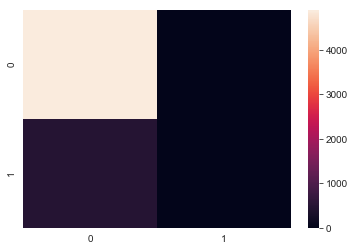

In [27]:
print(confusion_matrix(y_test, y_pred))
print('')
sns.heatmap(confusion_matrix(y_test, y_pred)) # heatmap for the confusion matrix


In [28]:
print(accuracy_score(y_test, y_pred))

0.9108007448789571
